In [1]:
from intent_recognition import *

# ZIPF'S LAW

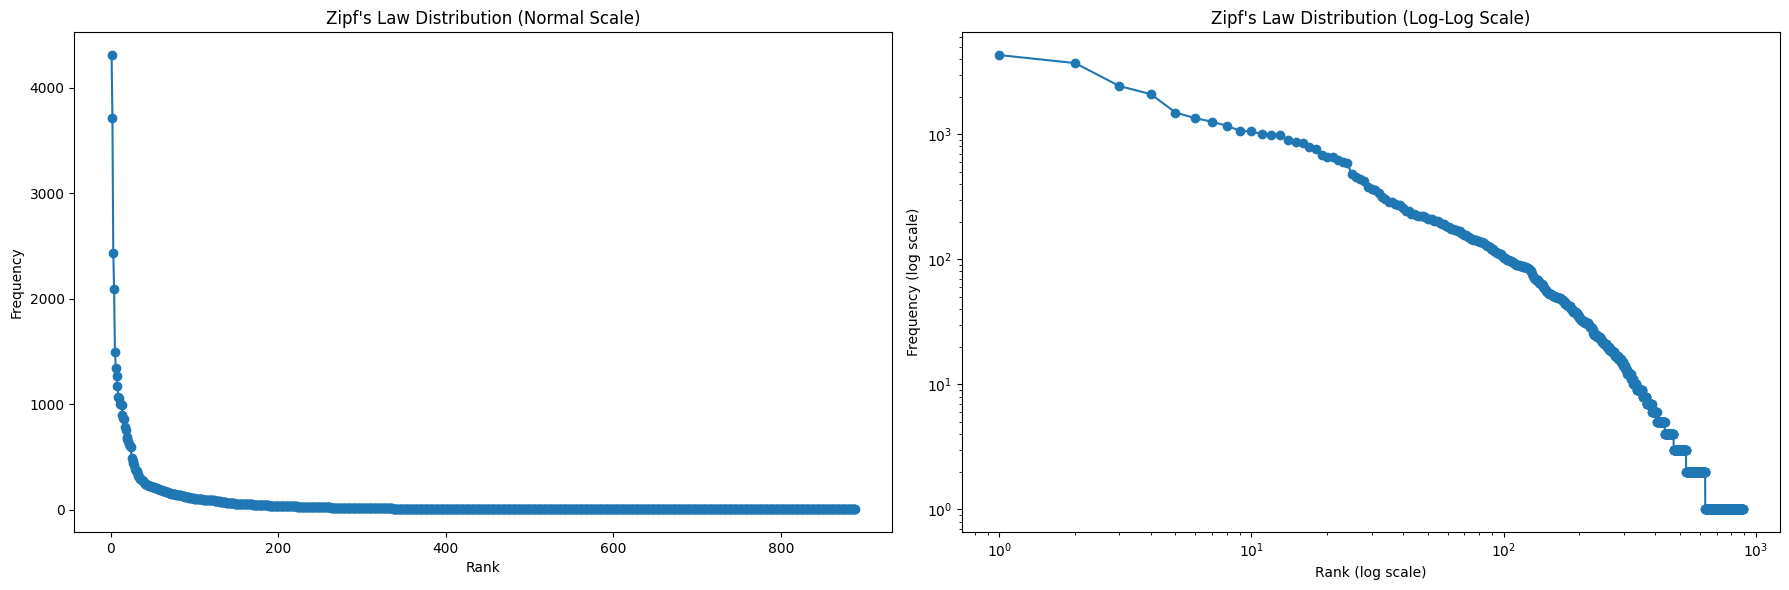

In [2]:
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../data/train.csv', header=None)[0]

# Initialize the tokenizer and fit it on the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)

# Obtain the word counts
word_counts = tokenizer.word_counts
sorted_counts = sorted(word_counts.values(), reverse=True)

# Generate the Zipf's Law plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Normal plot
ax1.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("Zipf's Law Distribution (Normal Scale)")

# Log-log plot
ax2.plot(range(1, len(sorted_counts) + 1), sorted_counts, marker='o')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel("Rank (log scale)")
ax2.set_ylabel("Frequency (log scale)")
ax2.set_title("Zipf's Law Distribution (Log-Log Scale)")

plt.tight_layout()
plt.show()


In [3]:
 default_hyperparams = {'vocab_size': 500, 'embedding_dim': 768, 'epochs': 5, 'batch_size': 32}
        self.hyperparams = {**default_hyperparams, **hyperparams}
        default_config = {'lemmatize':False, 'stem':False, 'remove_stopwords':False, 'custom_stopwords':None, 'padding':'pre'}

IndentationError: unexpected indent (276145634.py, line 2)

In [7]:
tf.keras.utils.set_random_seed(42)

# Define the hyperparameters and training configuration
vocab_size = [100, 250, 500, 750, 889]
embedding_dim = [500, 750]
lem_stem = [(True, False), (False, True), (False, False)]
remove_stopwords = [True, False]
use_class_weights = [True, False]
use_augmented_data = [True, False]

hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

total_combinations = len(vocab_size) * len(embedding_dim) * len(lem_stem) * len(remove_stopwords) * len(use_class_weights) * len(use_augmented_data)
completed_combinations = 0

for vs in vocab_size:
    for ed in embedding_dim:
        for lem, st in lem_stem:
            for rs in remove_stopwords:
                for ucw in use_class_weights:
                    for uad in use_augmented_data:
                        completed_combinations += 1
                        progress = (completed_combinations / total_combinations) * 100
                        print(f"Progress: {progress:.2f}%")
                        # Update hyperparams and train_config
                        hyperparams['vocab_size'] = vs
                        hyperparams['embedding_dim'] = ed
                        train_config['lemmatize'] = lem
                        train_config['stem'] = st
                        train_config['remove_stopwords'] = rs
                        train_config['use_class_weights'] = ucw
                        train_config['use_augmented_data'] = uad
                        model = Sequential()
                        model.add(GlobalMaxPooling1D())
                        model.add(Dense(128, activation="relu"))
                        model.add(Dense(64, activation="relu"))
                        basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"testing_vs{vs}_ed{ed}_lem{lem}_st{st}_rs{rs}_ucw{ucw}_uad{uad}", save_results=True, results_file_name="preprocessing_larger.csv")
                        basic.train_model()
                        basic.print_training_information()
                        basic.evaluate_model()

Progress: 0.42%
Training model 2/2

Average Training Accuracy: 0.8341098427772522
Average Training F1: 0.6261011362075806
Average Training Loss: 0.2225891873240471
Average Validation Accuracy: 0.772777795791626
Average Validation F1: 0.3607398271560669
Average Validation Loss: 0.8492359817028046
Best Model Validation Accuracy: 0.7811111211776733
Best Model Validation F1: 0.35393068194389343

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8247 - f1_score: 0.3013 - loss: 0.6757
Test accuracy: 0.8006756901741028
Test Macro F1: 0.34890511631965637
Progress: 0.83%
Training model 2/2

Average Training Accuracy: 0.8500490486621857
Average Training F1: 0.6627252101898193
Average Training Loss: 0.23369678109884262
Average Validation Accuracy: 0.7661111056804657
Average Validation F1: 0.3660188615322113
Average Validation Loss: 0.8628089427947998
Best Model Validation Accuracy: 0.7877777814865112
Best Model Validation F1: 0.35612428188323975

Evaluating model...
28/28

# Train CNN 1D

In [4]:
tf.keras.utils.set_random_seed(42)

# Define the hyperparameters and training configuration
vocab_size = 500
embedding_dim = 750
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = True
kernel_size = [3, 5, 7]
filters = [32, 64, 128]

hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 15, 'batch_size': 32}
train_config = {'use_class_weights': True}

total_combinations = len(kernel_size) * len(filters)
completed_combinations = 0

for ks in kernel_size:
    for f in filters:
        completed_combinations += 1
        progress = (completed_combinations / total_combinations) * 100
        print(f"Progress: {progress:.2f}%")
        # Update hyperparams and train_config
        hyperparams['vocab_size'] = vocab_size
        hyperparams['embedding_dim'] = embedding_dim
        train_config['lemmatize'] = lem
        train_config['use_class_weights'] = use_class_weights
        train_config['use_augmented_data'] = use_augmented_data
        model = Sequential()
        model.add(Conv1D(filters=f, kernel_size=ks, activation='relu'))
        model.add(GlobalMaxPooling1D())
        model.add(Dense(128, activation="relu"))
        model.add(Dense(64, activation="relu"))
        basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_ks_{ks}_f_{f}", save_results=True, results_file_name="cnn_results/CNN.csv")
        basic.train_model()
        basic.print_training_information()
        basic.evaluate_model()

Progress: 11.11%
Training model 2/2

Average Training Accuracy: 0.987739086151123
Average Training F1: 0.9678475260734558
Average Training Loss: 0.006938001373782754
Average Validation Accuracy: 0.9505555629730225
Average Validation F1: 0.6116016805171967
Average Validation Loss: 0.27626024931669235
Best Model Validation Accuracy: 0.9555555582046509
Best Model Validation F1: 0.5901590585708618

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - f1_score: 0.4206 - loss: 0.4375 
Test accuracy: 0.9189189076423645
Test Macro F1: 0.5210207104682922
Progress: 22.22%
Training model 2/2

Average Training Accuracy: 0.9926434457302094
Average Training F1: 0.9856662750244141
Average Training Loss: 0.004854628583416343
Average Validation Accuracy: 0.9605555534362793
Average Validation F1: 0.590866357088089
Average Validation Loss: 0.23873662948608398
Best Model Validation Accuracy: 0.9611111283302307
Best Model Validation F1: 0.5811695456504822

Evaluating model...
28/

In [9]:
# Define the hyperparameters and training configuration
vocab_size = 500
embedding_dim = 750
lem = True
remove_stopwords = False
use_class_weights = True
use_augmented_data = [True, False]
kernel_size = [3, 5]
filters = [128, 256]

total_combinations = len(kernel_size) * len(filters) * len(use_augmented_data)
completed_combinations = 0

for ks in kernel_size:
    for f in filters:
        for u in use_augmented_data:
            completed_combinations += 1
            progress = (completed_combinations / total_combinations) * 100
            print(f"Progress: {progress:.2f}%")
            # Update hyperparams and train_config
            hyperparams['vocab_size'] = vocab_size
            hyperparams['embedding_dim'] = embedding_dim
            train_config['lemmatize'] = lem
            train_config['use_class_weights'] = use_class_weights
            train_config['use_augmented_data'] = u
            model = Sequential()
            model.add(Conv1D(filters=f, kernel_size=ks, activation='relu'))
            model.add(GlobalMaxPooling1D())
            model.add(Dense(128, activation="relu"))
            model.add(Dense(64, activation="relu"))
            basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=2, verbosing=0, name=f"CNN_ks_{ks}_f_{f}_augmented_data_{u}", save_results=True, results_file_name="CNN_specific.csv")
            basic.train_model()
            basic.print_training_information()
            basic.evaluate_model()

Progress: 12.50%
Training model 2/2

Average Training Accuracy: 0.9944826066493988
Average Training F1: 0.9845149219036102
Average Training Loss: 0.0038902712985873222
Average Validation Accuracy: 0.9649999737739563
Average Validation F1: 0.6207456886768341
Average Validation Loss: 0.2135060429573059
Best Model Validation Accuracy: 0.9666666388511658
Best Model Validation F1: 0.640934944152832

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9485 - f1_score: 0.4766 - loss: 0.3945
Test accuracy: 0.9380630850791931
Test Macro F1: 0.5554176568984985
Progress: 25.00%
Training model 2/2

Average Training Accuracy: 0.9931339025497437
Average Training F1: 0.9840461313724518
Average Training Loss: 0.004242963157594204
Average Validation Accuracy: 0.9655555486679077
Average Validation F1: 0.6338901817798615
Average Validation Loss: 0.21175304055213928
Best Model Validation Accuracy: 0.9666666388511658
Best Model Validation F1: 0.6378719806671143

Evaluating model...
28/